In [124]:
import pandas as pd
%matplotlib inline

In [125]:
df = pd.read_csv('downsampled_weatherdata.csv')
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
2,2,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
3,3,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
4,4,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [126]:
df.shape

(158726, 13)

In [127]:
df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,158726.000000,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,79362.500000,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,45820.393751,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,39681.250000,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,79362.500000,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,119043.750000,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,158725.000000,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [128]:
df[(df.rain_accumulation == 0.0)].shape 

# Notice that rain_accumulation is zero for a large # of rows

(157812, 13)

In [129]:
df[(df.rain_duration == 0.0)].shape

# Notice that rain_duration is zero for a large # of rows

(157237, 13)

In [130]:
# Delete columns we don't need for clustering

del df['rain_accumulation']
del df['rain_duration']
del df['hpwren_timestamp']

In [131]:
workingDF = df.copy(deep=True)

In [132]:
before = workingDF.shape[0]
workingDF = workingDF.dropna()
after = workingDF.shape[0]
before - after

46

In [133]:
workingDF.columns

Index([u'rowID', u'air_pressure', u'air_temp', u'avg_wind_direction',
       u'avg_wind_speed', u'max_wind_direction', u'max_wind_speed',
       u'min_wind_direction', u'min_wind_speed', u'relative_humidity'],
      dtype='object')

# Which features to use for Clustering ?

In [140]:
featuresUsed = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

workingDF = workingDF[featuresUsed]

In [141]:
workingDF.head(3)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
1,912.3,62.24,144.0,1.2,167.0,1.8,38.5
2,912.2,63.32,100.0,2.0,122.0,2.5,58.3


# KMeans Clustering

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0).fit(workingDF)

In [143]:
centers = kmeans.cluster_centers_

In [144]:
centers

array([[ 919.45830679,   63.41059948,   52.31359205,    4.11701419,
          69.60705667,    5.09442031,   21.45211893],
       [ 916.85724614,   71.58441391,  212.28399558,    2.90772627,
         226.5910596 ,    3.49765453,   35.32387417],
       [ 917.44910868,   64.59161875,  341.29255319,    1.49305635,
          21.09330075,    2.08356814,   42.31345601],
       [ 917.37716786,   63.08928401,  324.16666667,    1.52183771,
         343.62344206,    2.05625829,   43.28766905],
       [ 914.93234392,   49.69422519,  176.19213974,    3.3247197 ,
         189.68623864,    3.99207483,   83.08479287],
       [ 916.24110683,   66.54174814,  172.75136784,    2.53178312,
         186.09404431,    3.00687506,   35.98117768],
       [ 915.81834021,   50.93848693,  242.5012991 ,    2.74982424,
         265.61134036,    3.56828672,   75.74528504],
       [ 917.00921432,   62.41208554,   95.32472369,    1.31970207,
         120.37626141,    1.70194618,   46.18816675],
       [ 917.57201981,  

In [145]:
import numpy as np

# Function to keep centers (0,1,2,....) and features together 

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

P = pd_centers(featuresUsed, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,919.458307,63.410599,52.313592,4.117014,69.607057,5.094420,21.452119,0
1,916.857246,71.584414,212.283996,2.907726,226.591060,3.497655,35.323874,1
2,917.449109,64.591619,341.292553,1.493056,21.093301,2.083568,42.313456,2
3,917.377168,63.089284,324.166667,1.521838,343.623442,2.056258,43.287669,3
4,914.932344,49.694225,176.192140,3.324720,189.686239,3.992075,83.084793,4
5,916.241107,66.541748,172.751368,2.531783,186.094044,3.006875,35.981178,5
6,915.818340,50.938487,242.501299,2.749824,265.611340,3.568287,75.745285,6
7,917.009214,62.412086,95.324724,1.319702,120.376261,1.701946,46.188167,7
8,917.572020,67.572226,18.494558,1.788718,34.010493,2.222212,29.720185,8
9,915.206127,55.049563,210.122340,4.257134,220.640023,5.027926,71.356866,9


In [146]:
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

#Function to help plot the centers on a Parallel Plot

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)) #.gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

## Dry Days

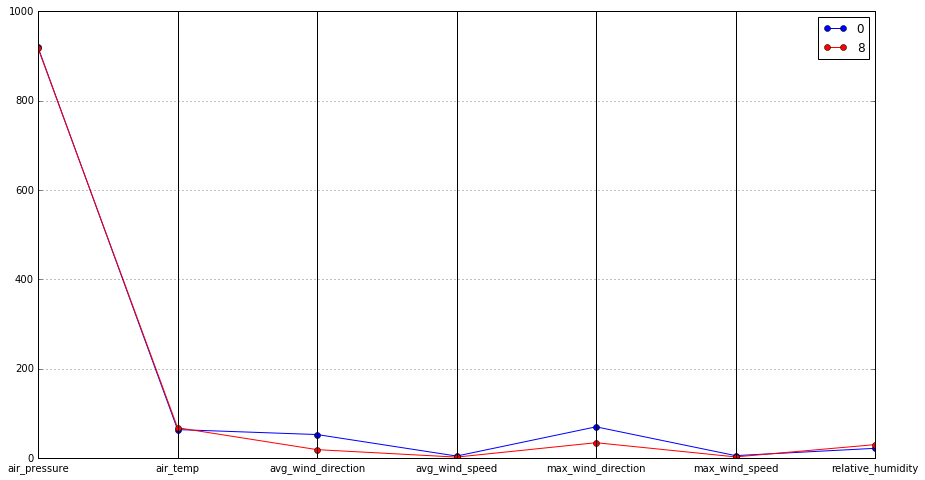

In [147]:
parallel_plot(P[P['relative_humidity'] < 30.0], P)

## Warm Days

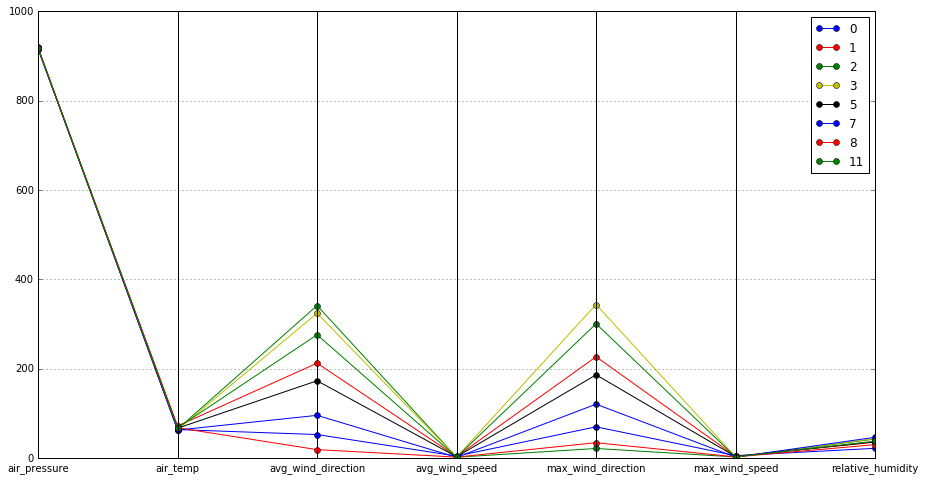

In [148]:
parallel_plot(P[P['air_temp'] > 60.0], P)

## Cool Days

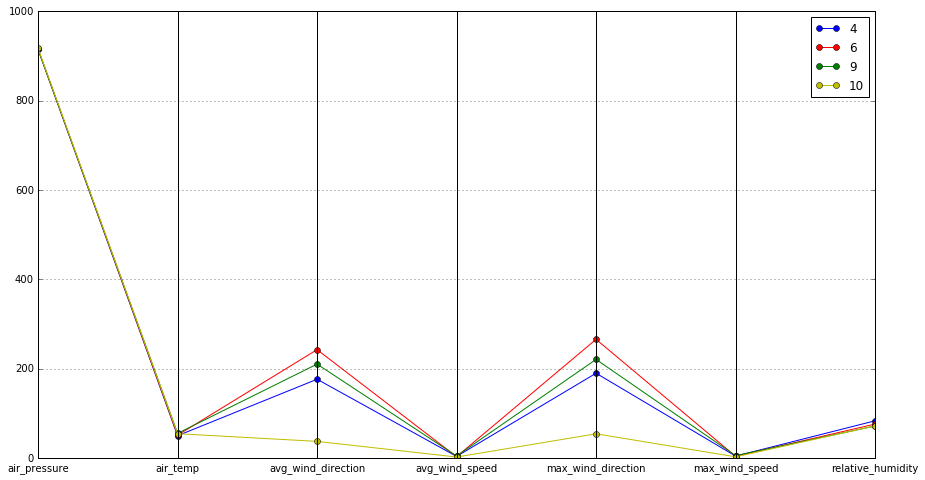

In [149]:
parallel_plot(P[(P['relative_humidity'] > 30) & (P['air_temp'] < 60)], P)